In [87]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sklearn.preprocessing as pre
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#logistic library
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.tools as tools

# LOADING THE DATA

## LOGISTIC REGRESSION WITH statsmodels.formula.api

In [7]:
from sklearn.datasets import load_breast_cancer
cancer1 = load_breast_cancer()
#cancer1

In [8]:
print("Predictors: ", cancer1.feature_names)

Predictors:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
len(cancer1.feature_names)

30

In [11]:
print("\nResponse: ", cancer1.target_names)


Response:  ['malignant' 'benign']


In [13]:
cancer = pd.DataFrame(cancer1.data, columns=cancer1.feature_names)
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
cancer.columns =cancer.columns.str.replace(' ', '')

In [18]:
cancer

,meanradius,meantexture,meanperimeter,meanarea,meansmoothness,meancompactness,meanconcavity,meanconcavepoints,meansymmetry,meanfractaldimension,...,worstradius,worsttexture,worstperimeter,worstarea,worstsmoothness,worstcompactness,worstconcavity,worstconcavepoints,worstsymmetry,worstfractaldimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:>

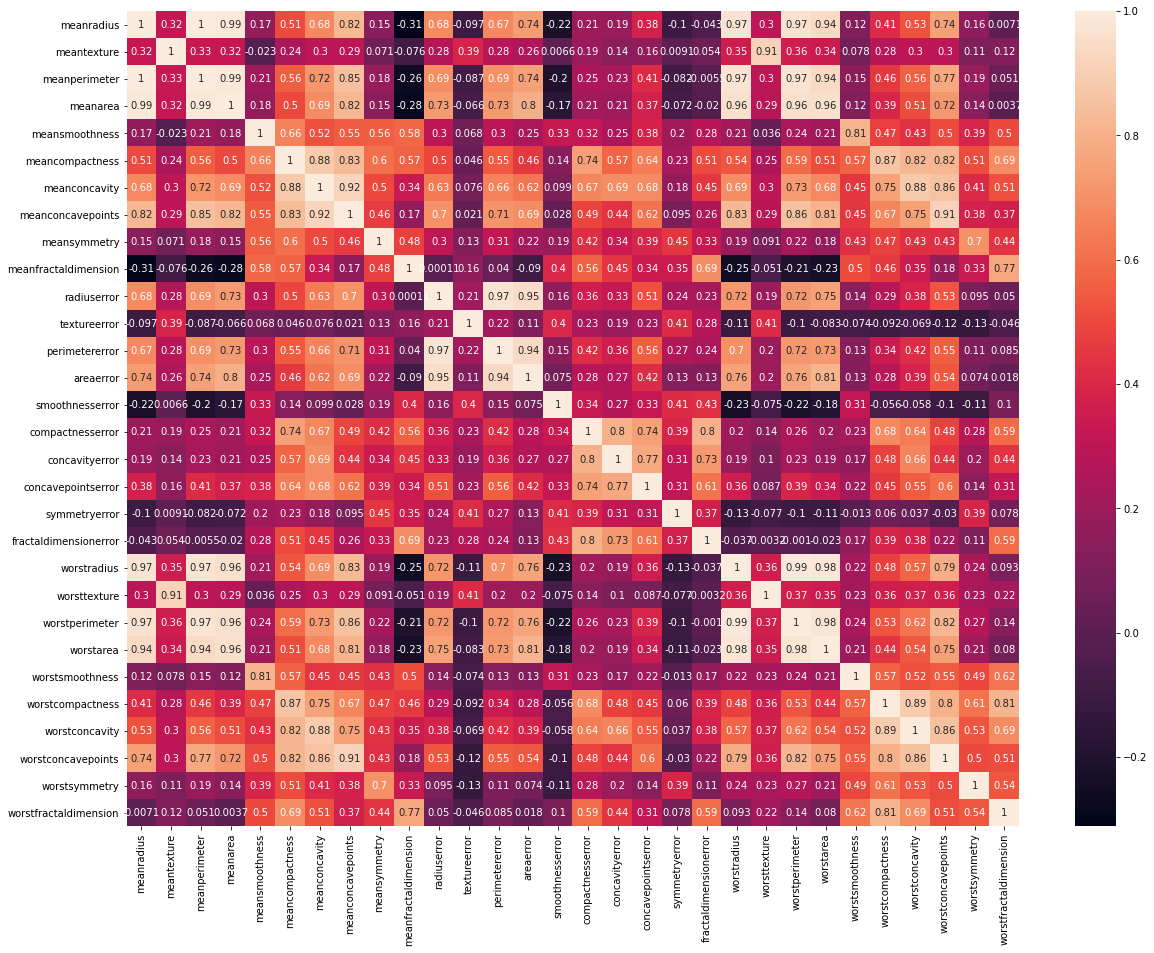

In [21]:
plt.figure(figsize = (20,15))
sns.heatmap(cancer.corr(), annot = True)

In [23]:
# Add a column for the response variable: malignant or benign
cancer['Target'] = cancer1.target
cancer.head()

,meanradius,meantexture,meanperimeter,meanarea,meansmoothness,meancompactness,meanconcavity,meanconcavepoints,meansymmetry,meanfractaldimension,...,worsttexture,worstperimeter,worstarea,worstsmoothness,worstcompactness,worstconcavity,worstconcavepoints,worstsymmetry,worstfractaldimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [24]:
cancer.shape

(569, 31)

In [89]:
# Select the first 10 columns of our DataFrame that we will use as the predictors in our models
x = cancer.iloc[:,:10]

# Select the response column 
y = cancer.Target

In [90]:
x

,meanradius,meantexture,meanperimeter,meanarea,meansmoothness,meancompactness,meanconcavity,meanconcavepoints,meansymmetry,meanfractaldimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [91]:
x.columns

Index(['meanradius', 'meantexture', 'meanperimeter', 'meanarea',
       'meansmoothness', 'meancompactness', 'meanconcavity',
       'meanconcavepoints', 'meansymmetry', 'meanfractaldimension'],
      dtype='object')

In [92]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   meanradius            569 non-null    float64
 1   meantexture           569 non-null    float64
 2   meanperimeter         569 non-null    float64
 3   meanarea              569 non-null    float64
 4   meansmoothness        569 non-null    float64
 5   meancompactness       569 non-null    float64
 6   meanconcavity         569 non-null    float64
 7   meanconcavepoints     569 non-null    float64
 8   meansymmetry          569 non-null    float64
 9   meanfractaldimension  569 non-null    float64
dtypes: float64(10)
memory usage: 44.6 KB


In [93]:
x.describe()

,meanradius,meantexture,meanperimeter,meanarea,meansmoothness,meancompactness,meanconcavity,meanconcavepoints,meansymmetry,meanfractaldimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [94]:
# Split these data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=123, stratify = y)

In [95]:
# Create the formula string 
all_columns = ' + '.join(cancer.columns[:10])
formula = "Target ~ " + all_columns 
print("Formula: ", formula, "\n")

Formula:  Target ~ meanradius + meantexture + meanperimeter + meanarea + meansmoothness + meancompactness + meanconcavity + meanconcavepoints + meansymmetry + meanfractaldimension 



In [96]:
trainingdata = pd.concat([x_train,y_train], axis = 1)
trainingdata

,meanradius,meantexture,meanperimeter,meanarea,meansmoothness,meancompactness,meanconcavity,meanconcavepoints,meansymmetry,meanfractaldimension,Target
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.000000,0.1060,0.05502,1
54,15.100,22.02,97.26,712.8,0.09056,0.07081,0.052530,0.033340,0.1616,0.05684,0
541,14.470,24.99,95.81,656.4,0.08837,0.12300,0.100900,0.038900,0.1872,0.06341,1
472,14.920,14.93,96.45,686.9,0.08098,0.08549,0.055390,0.032210,0.1687,0.05669,1
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.011160,0.1791,0.06331,1
...,...,...,...,...,...,...,...,...,...,...,...
358,8.878,15.49,56.74,241.0,0.08293,0.07698,0.047210,0.023810,0.1930,0.06621,1
231,11.320,27.08,71.76,395.7,0.06883,0.03813,0.016330,0.003125,0.1869,0.05628,1
216,11.890,18.35,77.32,432.2,0.09363,0.11540,0.066360,0.031420,0.1967,0.06314,1
15,14.540,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.073640,0.2303,0.07077,0


In [97]:
# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()

Optimization terminated successfully.
         Current function value: 0.139002
         Iterations 11


In [98]:
# We can look at the model summary using the summary() method:
log_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                  426
Model:                          Logit   Df Residuals:                      415
Method:                           MLE   Df Model:                           10
Date:                Tue, 16 May 2023   Pseudo R-squ.:                  0.7896
Time:                        22:55:53   Log-Likelihood:                -59.215
converged:                       True   LL-Null:                       -281.44
Covariance Type:            nonrobust   LLR p-value:                 3.188e-89
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.2022     14.807     -0.014      0.989     -29.224      28.820
meanradius               2.2865      4.533      0.504      0.614      -6.598      11.171
meantexture             -0.3407      0.070     -4.895      0.000      -0.477      -0.204
meanperimeter            0.0654      0.606      0.108      0.914      -1.122       1.253
meanarea                -0.0399      0.019     -2.133      0.033      -0.077      -0.003
meansmoothness         -63.3098     37.732     -1.678      0.093    -137.263      10.643
meancompactness         -9.5854     23.524     -0.407      0.684     -55.691      36.520
meanconcavity           -8.6736      8.914     -0.973      0.331     -26.144       8.797
meanconcavepoints      -64.0337     32.804     -1.952      0.051    -128.328       0.261
meansymmetry           -18.7745     12.889     -1.457      0.145     -44.036       6.487
meanfractaldimension   135.2205     95.510      1.416      0.157     -51.975     322.416
========================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [99]:
# Predict responses 
pred_1 = log_reg_1.predict(x_test)

In [100]:
pred_1

118    7.797231e-04
406    7.393284e-01
81     8.479425e-01
547    9.988124e-01
79     9.849248e-01
           ...     
156    4.674728e-05
288    6.926530e-01
180    5.305014e-19
532    9.964573e-01
186    8.081560e-03
Length: 143, dtype: float64

In [101]:
prediction_1 = list(map(round, pred_1))
prediction_1

[0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0]

In [102]:
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.965034965034965


In [103]:
cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[50  3]
 [ 2 88]]


<AxesSubplot:>

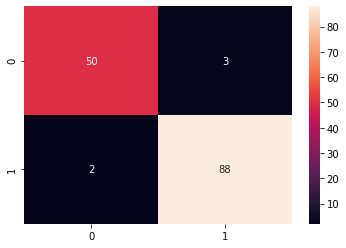

In [104]:
sns.heatmap(confusion_matrix(y_test, prediction_1), annot = True)

## LOGISTIC REGRESSION WITH statsmodels.api.logit

In [105]:
# add constant to training data
x_train_const = tools.add_constant(x_train)
# Train the logistic regression with the training data
log_reg_3 = sm.Logit(y_train, x_train_const).fit()

Optimization terminated successfully.
         Current function value: 0.139002
         Iterations 11


In [106]:
log_reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                  426
Model:                          Logit   Df Residuals:                      415
Method:                           MLE   Df Model:                           10
Date:                Tue, 16 May 2023   Pseudo R-squ.:                  0.7896
Time:                        22:58:16   Log-Likelihood:                -59.215
converged:                       True   LL-Null:                       -281.44
Covariance Type:            nonrobust   LLR p-value:                 3.188e-89
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2022     14.807     -0.014      0.989     -29.224      28.820
meanradius               2.2865      4.533      0.504      0.614      -6.598      11.171
meantexture             -0.3407      0.070     -4.895      0.000      -0.477      -0.204
meanperimeter            0.0654      0.606      0.108      0.914      -1.122       1.253
meanarea                -0.0399      0.019     -2.133      0.033      -0.077      -0.003
meansmoothness         -63.3098     37.732     -1.678      0.093    -137.263      10.643
meancompactness         -9.5854     23.524     -0.407      0.684     -55.691      36.520
meanconcavity           -8.6736      8.914     -0.973      0.331     -26.144       8.797
meanconcavepoints      -64.0337     32.804     -1.952      0.051    -128.328       0.261
meansymmetry           -18.7745     12.889     -1.457      0.145     -44.036       6.487
meanfractaldimension   135.2205     95.510      1.416      0.157     -51.975     322.416
========================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [110]:
x_test_const = tools.add_constant(x_test)
y_pred = round(log_reg_3.predict(x_test_const))

In [118]:
prediction_1 = list(map(round, y_pred))
prediction_1

[0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0]

In [120]:
accuracy = accuracy_score(prediction_1, y_test)
accuracy

0.965034965034965

In [121]:
mat = confusion_matrix(prediction_1, y_test)
mat

array([[50,  2],
       [ 3, 88]], dtype=int64)